# Covid19 - Real Time Monitoring and Analysis
## Realtime data from Folkhälsomyndigheten
Datafile source:
https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data

Realtime data from Folkhalsomyndigheten
https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa

<span style="color:red">Please Notice</span>: The code below can fail to run if Folkhälsomyndigheten changes the format of the excel files provided. Check that the names of the different sheets, columns etc, are correct in case of errors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette("deep", desat=0.5)
sns.set_style("darkgrid")
base_color = sns.color_palette()[0]
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
xls = pd.ExcelFile('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')
data = pd.read_excel(xls, 'Antal per dag region')
data2 = pd.read_excel(xls, 'Antal avlidna per dag')
data3 = pd.read_excel(xls, 'Totalt antal per åldersgrupp')


# How does the data looks like?

In [3]:
# Data privided by Folkhälsomyndigheten
data.head(10)

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-02-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-02-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 23 columns):
Statistikdatum         81 non-null datetime64[ns]
Totalt_antal_fall      81 non-null int64
Blekinge               81 non-null int64
Dalarna                81 non-null int64
Gotland                81 non-null int64
Gävleborg              81 non-null int64
Halland                81 non-null int64
Jämtland_Härjedalen    81 non-null int64
Jönköping              81 non-null int64
Kalmar                 81 non-null int64
Kronoberg              81 non-null int64
Norrbotten             81 non-null int64
Skåne                  81 non-null int64
Stockholm              81 non-null int64
Sörmland               81 non-null int64
Uppsala                81 non-null int64
Värmland               81 non-null int64
Västerbotten           81 non-null int64
Västernorrland         81 non-null int64
Västmanland            81 non-null int64
Västra_Götaland        81 non-null int64
Örebro                 81 n

In [5]:
# Convert Date columns to DateTime if they are not the right format 
#data['Statistikdatum']=pd.to_datetime(data['Statistikdatum'].astype(str), format='%Y/%m/%d')

# To avoid errors in case data is imputed in the wrong format (as in 2020-04-09) Convert Datum column to String format 
#data['Statistikdatum'] = data['Statistikdatum'].astype(str)

In [6]:
# Check if there are any empty cells without values
data.isnull().sum()

Statistikdatum         0
Totalt_antal_fall      0
Blekinge               0
Dalarna                0
Gotland                0
Gävleborg              0
Halland                0
Jämtland_Härjedalen    0
Jönköping              0
Kalmar                 0
Kronoberg              0
Norrbotten             0
Skåne                  0
Stockholm              0
Sörmland               0
Uppsala                0
Värmland               0
Västerbotten           0
Västernorrland         0
Västmanland            0
Västra_Götaland        0
Örebro                 0
Östergötland           0
dtype: int64

In [7]:
# If you get "Null" values in the code above, fill null cells with the value "0"
#data.fillna(0) # <------- In that case uncomment this line.

### Number of Days and Regions recorded

In [8]:
days = data.shape[0]
regions = data.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))


Total number of days recorded: 81
Number of regions: 23


### Count, Mean and Standard Deviations by Region

In [9]:
data.describe()

,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,216.876543,0.691358,7.555556,0.271605,5.864198,3.679012,3.222222,7.851852,1.691358,2.814815,...,86.012346,13.049383,9.901235,1.555556,3.370370,2.160494,7.716049,23.283951,9.901235,16.111111
std,239.551998,1.384214,10.833974,0.689426,7.921100,4.745596,4.639504,11.186053,2.537922,4.610074,...,92.051955,18.187153,12.731462,2.219234,4.889899,3.411220,11.589041,29.483569,17.106727,19.170290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,119.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,36.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000,9.000000
75%,394.000000,1.000000,12.000000,0.000000,11.000000,6.000000,5.000000,12.000000,2.000000,4.000000,...,172.000000,20.000000,15.000000,3.000000,5.000000,3.000000,14.000000,32.000000,11.000000,29.000000
max,738.000000,6.000000,42.000000,4.000000,30.000000,19.000000,19.000000,49.000000,11.000000,21.000000,...,289.000000,64.000000,44.000000,11.000000,19.000000,17.000000,46.000000,123.000000,75.000000,70.000000


### Correlation > Region - Number of cases
The correlation describes the relation between the number of cases and the region. In this case it's not a cause-effetec correlation because the number of cases does not depend on the region. This correlation table is a descriptive relation that shows in what level from 0 to 1 a region is placed depending on the number of cases registered in the region. I explain more on this in the "Linear view" below.

In [10]:
# Create a data correlation dataframe:
corr_df_master = data.corr()
corr_target = corr_df_master.iloc[0][:] # The correlation target is the 'Totalt_antal_fall' column 
corr = corr_target.sort_values(ascending=True)
corr_df = pd.DataFrame(corr)
corr_df.reset_index(level=0, inplace=True)
corr_df.columns = ['features', 'correlation']
corr_df

,features,correlation
0,Gotland,0.354724
1,Blekinge,0.477090
2,Skåne,0.534366
3,Värmland,0.541798
4,Jämtland_Härjedalen,0.711750
5,Västernorrland,0.730875
6,Norrbotten,0.773566
7,Örebro,0.773975
8,Kalmar,0.775373
9,Västerbotten,0.793182


### Correlations - Linear View
This linear view shows in what level from 0 to 1 a region is placed depending on the number of cases registered in the region. The orange line at the botton shows how the dotted curve should look liken whe the crisis has totally passed. That means no cases in any region. So the dotted line should be flattening and progesively getting lower and aproaching 0. But during the time the virus is active an movin around regions the dotted line could be changing it's form, for example cases lowering in Stockholm but icreasing in another regions. An animation of the development of the curve could be created by comparing data day by day. I'd like to believe that eventually, precdictions could be made  from the movement of the curve.

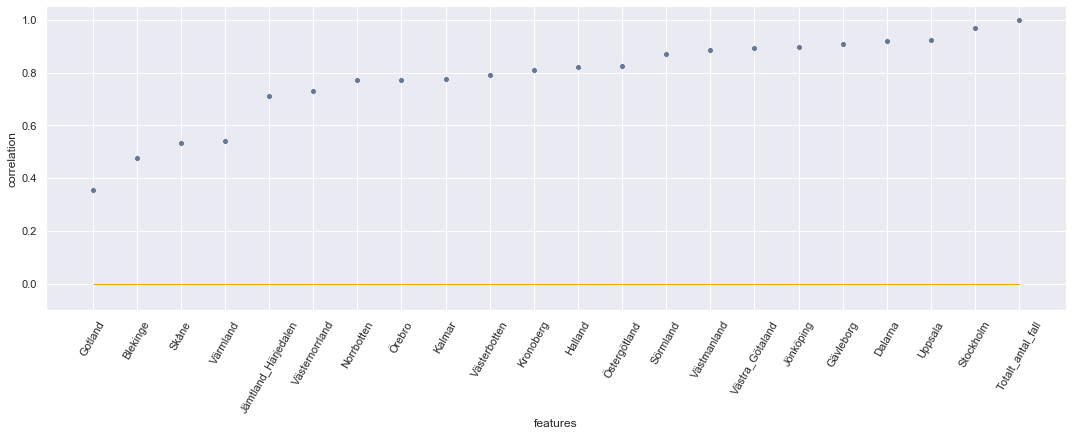

In [11]:
sns.relplot(x='features', y='correlation', data=corr_df, aspect=3)
plt.ylim([-0.1, 1.05]) 
plt.xticks(rotation=60);

# Correlation reference line at y=0
f = len(corr_df.features) -1
plt.plot([0, f], [0, 0], linewidth=1, c='orange');


### Distribution of Correlations
In this graph you can see how the correlation level is distributed and how many regions have the level of correlation from 0 to 1.

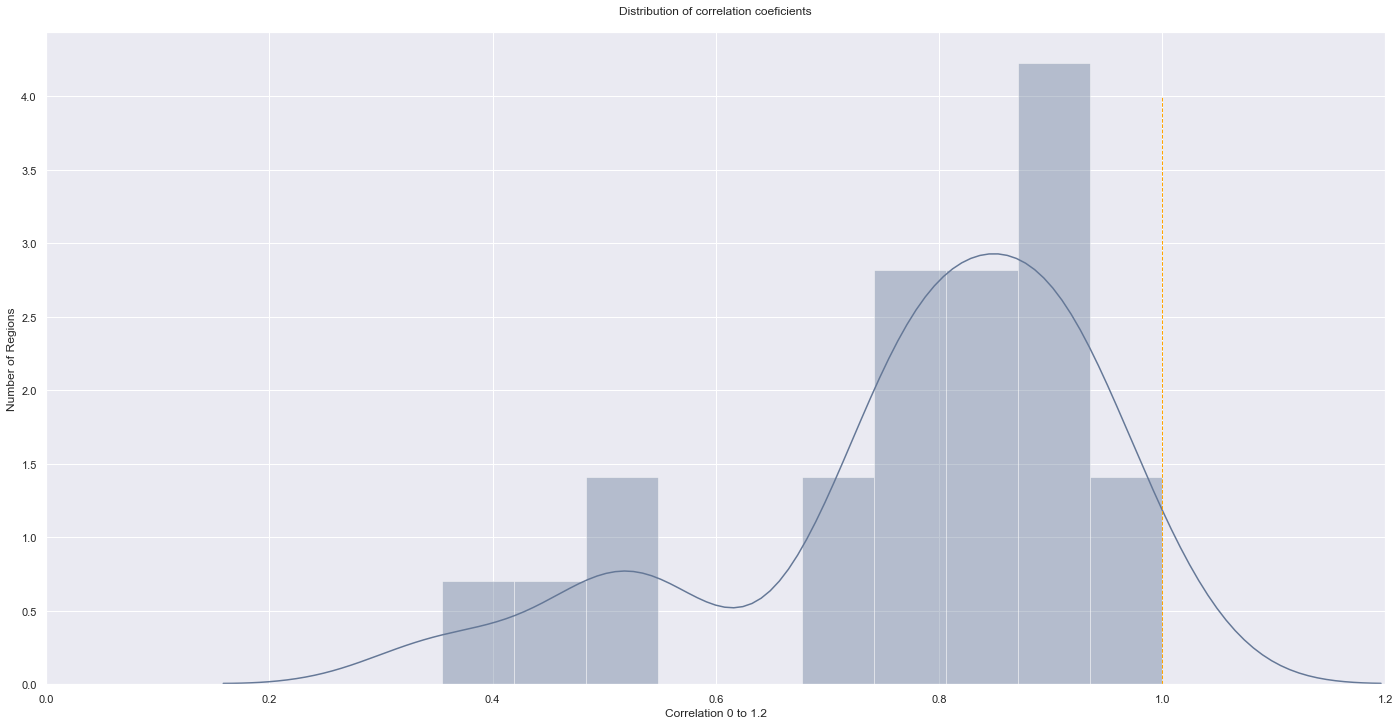

In [12]:
# Observing the distribution of correlation coeficients
fig, ax = plt.subplots(figsize=(24, 12))
sns.distplot(corr_df.correlation, kde=True, bins = 10, ax=ax)
plt.xlim([0, 1.2])
plt.ylabel('Number of Regions')
plt.xlabel('Correlation 0 to 1.2')
ax.set_title("Distribution of correlation coeficients\n");

# Correlation reference line at x=1
plt.plot([1, 1], [0, 4], linewidth=1, c='orange', linestyle='--');

# Affected Cases

### Cases Totals

In [13]:
# Total number of cases
data['Totalt_antal_fall'].sum()

17567

In [14]:
# Mean of cases/region
data['Totalt_antal_fall'].mean()

216.87654320987653

### Amount of Cases by Day

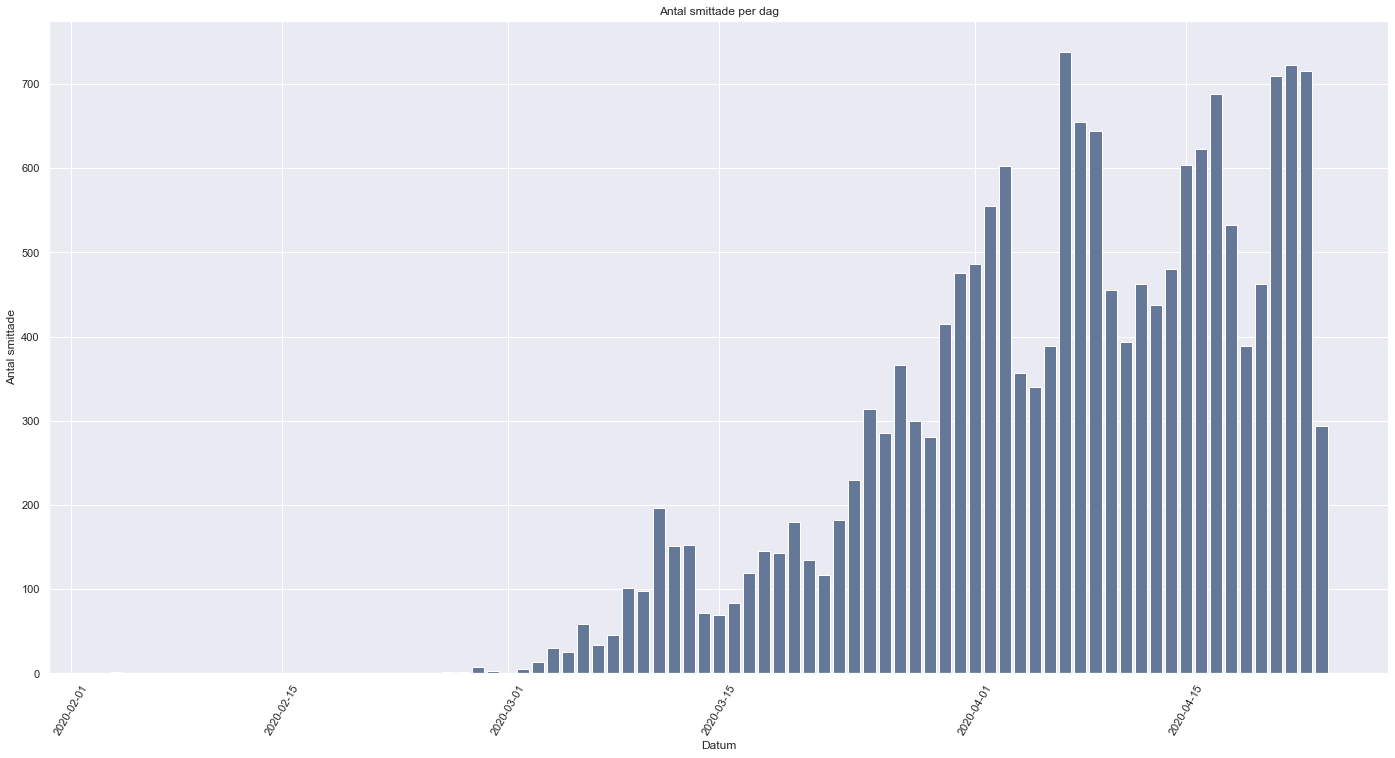

In [15]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data.Statistikdatum.values,
       data['Totalt_antal_fall'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal smittade",
       title="Antal smittade per dag")
plt.xticks(rotation=60);
plt.show()

In [16]:
# For the next step we create a subset with only regions as columns. We call it "region"
region = data.iloc[:, 2:]
region

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,10,1,4,10,1,8,6,9,8,...,211,14,32,7,4,2,28,50,23,24
77,4,35,0,22,17,13,49,11,14,3,...,163,55,32,7,5,12,39,123,64,35
78,6,33,3,22,19,18,31,11,13,5,...,289,50,31,5,9,4,18,79,27,29
79,2,42,0,13,11,8,40,10,17,9,...,281,25,36,3,12,17,26,74,38,29


In [17]:
# Columns in the dataset "region"
region.columns.tolist()

['Blekinge',
 'Dalarna',
 'Gotland',
 'Gävleborg',
 'Halland',
 'Jämtland_Härjedalen',
 'Jönköping',
 'Kalmar',
 'Kronoberg',
 'Norrbotten',
 'Skåne',
 'Stockholm',
 'Sörmland',
 'Uppsala',
 'Värmland',
 'Västerbotten',
 'Västernorrland',
 'Västmanland',
 'Västra_Götaland',
 'Örebro',
 'Östergötland']

In [18]:
days = region.shape[0]
regions = region.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))

Total number of days recorded: 81
Number of regions: 21


### Amount of Cases by Region


In [19]:
region = region.sum(axis = 0, skipna = True) 
region = pd.DataFrame(region)
region.reset_index(level=0, inplace=True)
region.columns = ['region', 'cases']
region = region.sort_values(by='cases', ascending=False)
region

,region,cases
11,Stockholm,6967
18,Västra_Götaland,1886
20,Östergötland,1305
12,Sörmland,1057
19,Örebro,802
13,Uppsala,802
6,Jönköping,636
17,Västmanland,625
1,Dalarna,612
10,Skåne,606


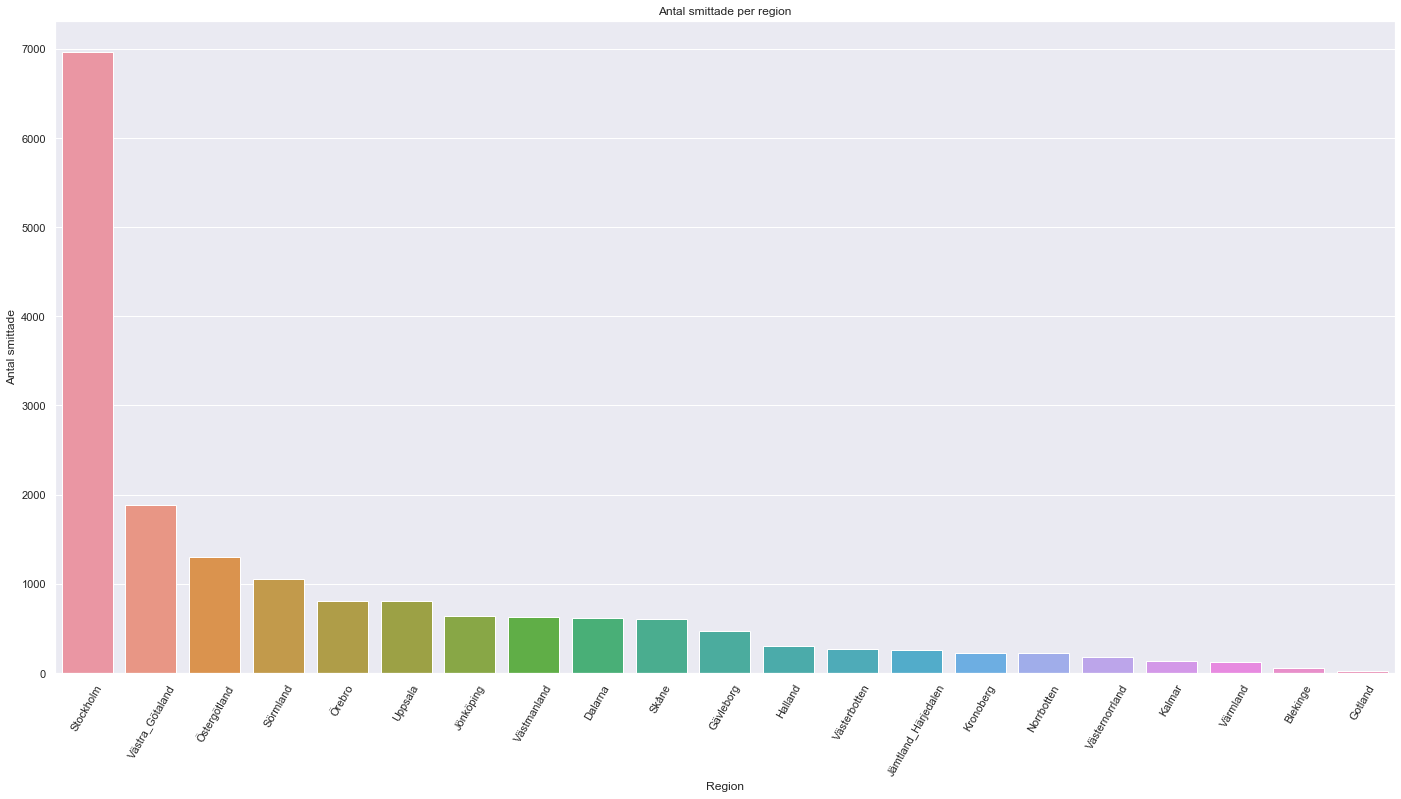

In [20]:
fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.barplot(x="region", y="cases", data=region)
ax.set(xlabel="Region",
       ylabel="Antal smittade",
       title="Antal smittade per region")
plt.xticks(rotation=60);

# Death Cases

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
Datum_avliden    46 non-null object
Antal_avlidna    46 non-null int64
dtypes: int64(1), object(1)
memory usage: 864.0+ bytes


In [22]:
# Convert Date columns to DateTime if they are not the right format 
# data2['Datum_avliden']=pd.to_datetime(data2['Datum_avliden'].astype(str), format='%Y/%m/%d')

# To avoid errors in case data is imputed in the wrong format (as in 2020-04-09) Convert Datum column to String format 
data2['Datum_avliden'] = data2['Datum_avliden'].astype(str)

In [23]:
# Check if there are any empty cells without values
data2.isnull().sum()

Datum_avliden    0
Antal_avlidna    0
dtype: int64

In [24]:
# If you get "Null" values in the code above, fill null cells with the value "0"
#data.fillna(0) # <------- In that case uncomment this line.

In [25]:
data2.head()

,Datum_avliden,Antal_avlidna
0,2020-03-11 00:00:00,1
1,2020-03-12 00:00:00,0
2,2020-03-13 00:00:00,1
3,2020-03-14 00:00:00,1
4,2020-03-15 00:00:00,2


In [26]:
data2.columns.tolist()

['Datum_avliden', 'Antal_avlidna']

### Deaths totals

In [27]:
# Total number of deaths
data2['Antal_avlidna'].sum()

2152

In [28]:
# Mean of deaths/region
data2['Antal_avlidna'].mean()

46.78260869565217

### Amount of deaths by Day


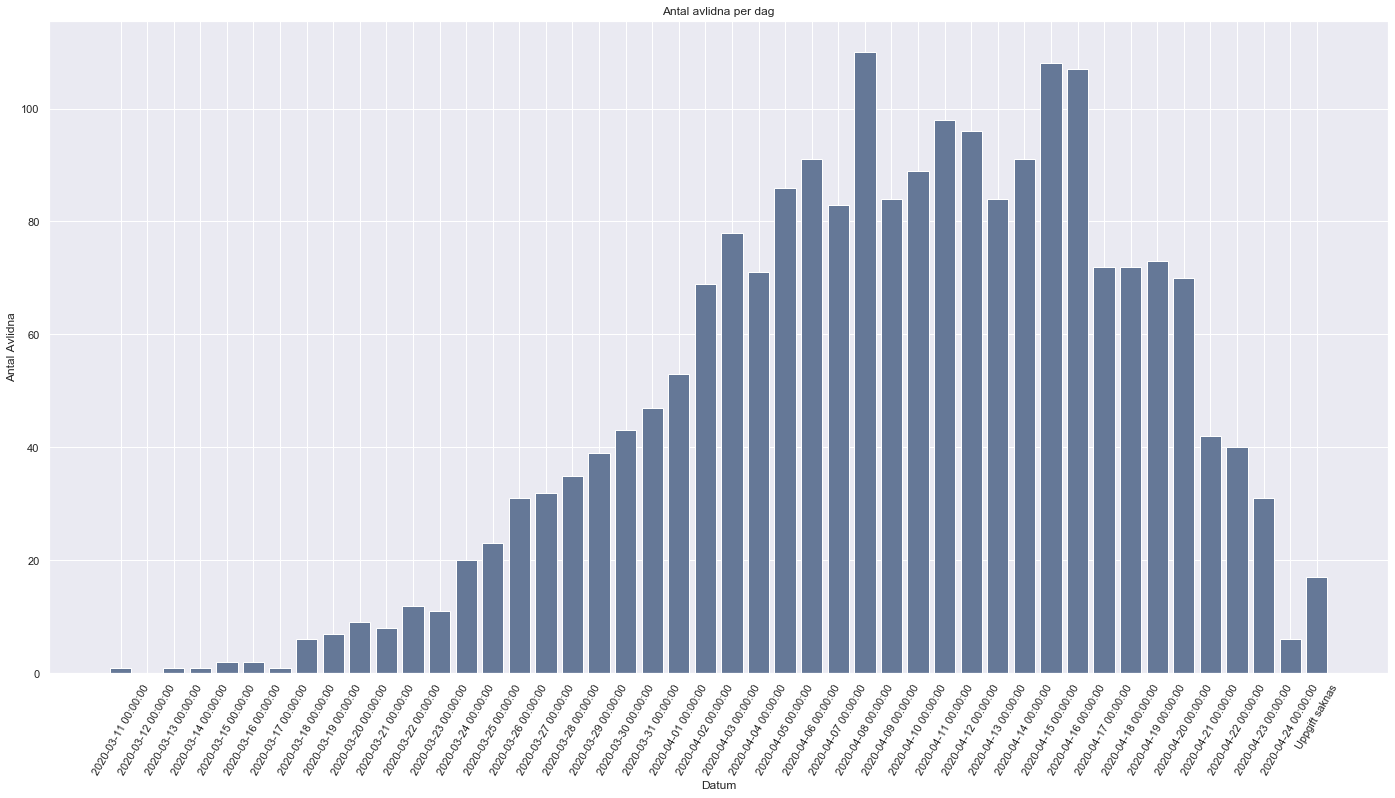

In [29]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data2.Datum_avliden.values,
       data2['Antal_avlidna'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal Avlidna",
       title="Antal avlidna per dag")
plt.xticks(rotation=60);
plt.show()

## Age: Deaths and Intensive Care

In [30]:
data3

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,91,1,0
1,Ålder_10_19,218,3,0
2,Ålder_20_29,1308,51,4
3,Ålder_30_39,1744,57,8
4,Ålder_40_49,2273,159,24
5,Ålder_50_59,3074,324,74
6,Ålder_60_69,2336,380,171
7,Ålder_70_79,2310,241,507
8,Ålder_80_89,2763,39,853
9,Ålder_90_plus,1443,1,511


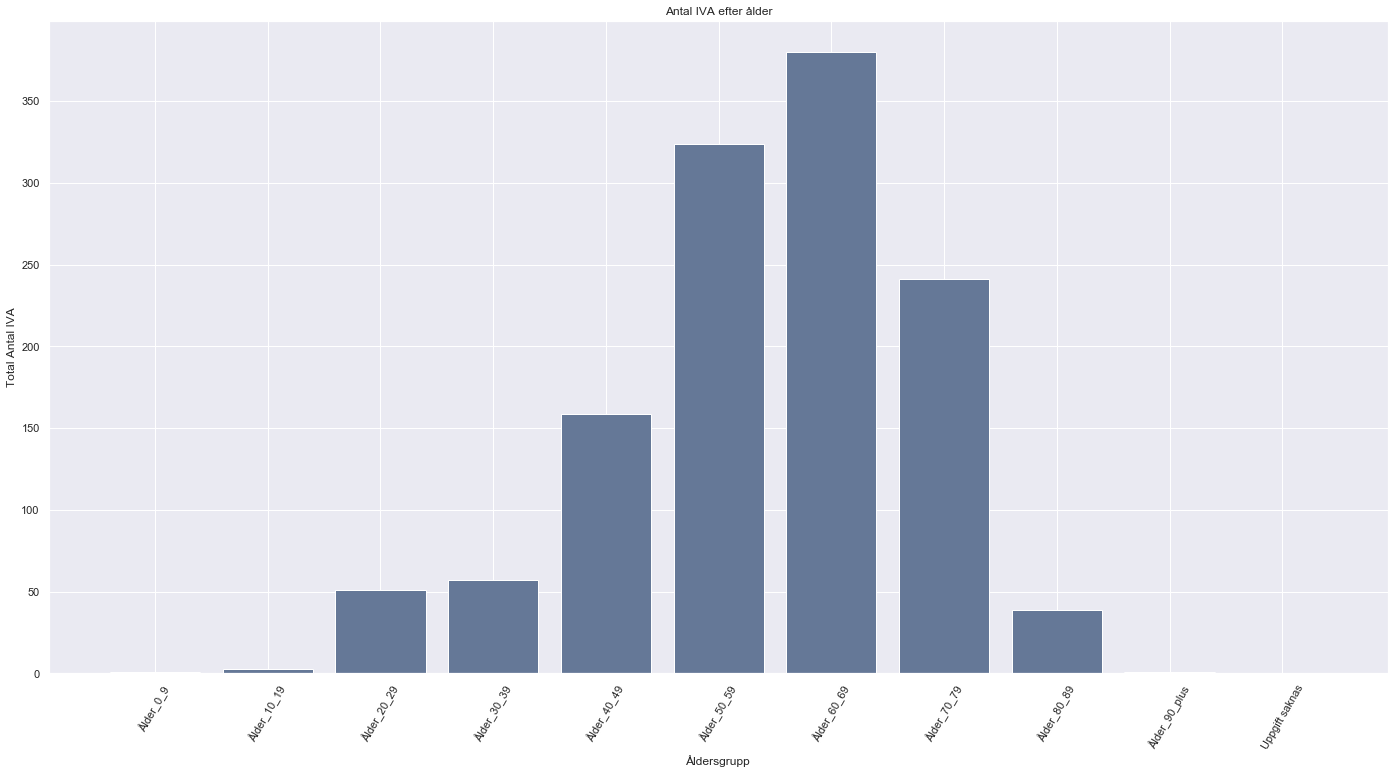

In [31]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data3['Åldersgrupp'].values,
       data3['Totalt_antal_intensivvårdade'])

# Set title and labels for axes
ax.set(xlabel="Åldersgrupp",
       ylabel="Total Antal IVA",
       title="Antal IVA efter ålder")
plt.xticks(rotation=60);
plt.show()

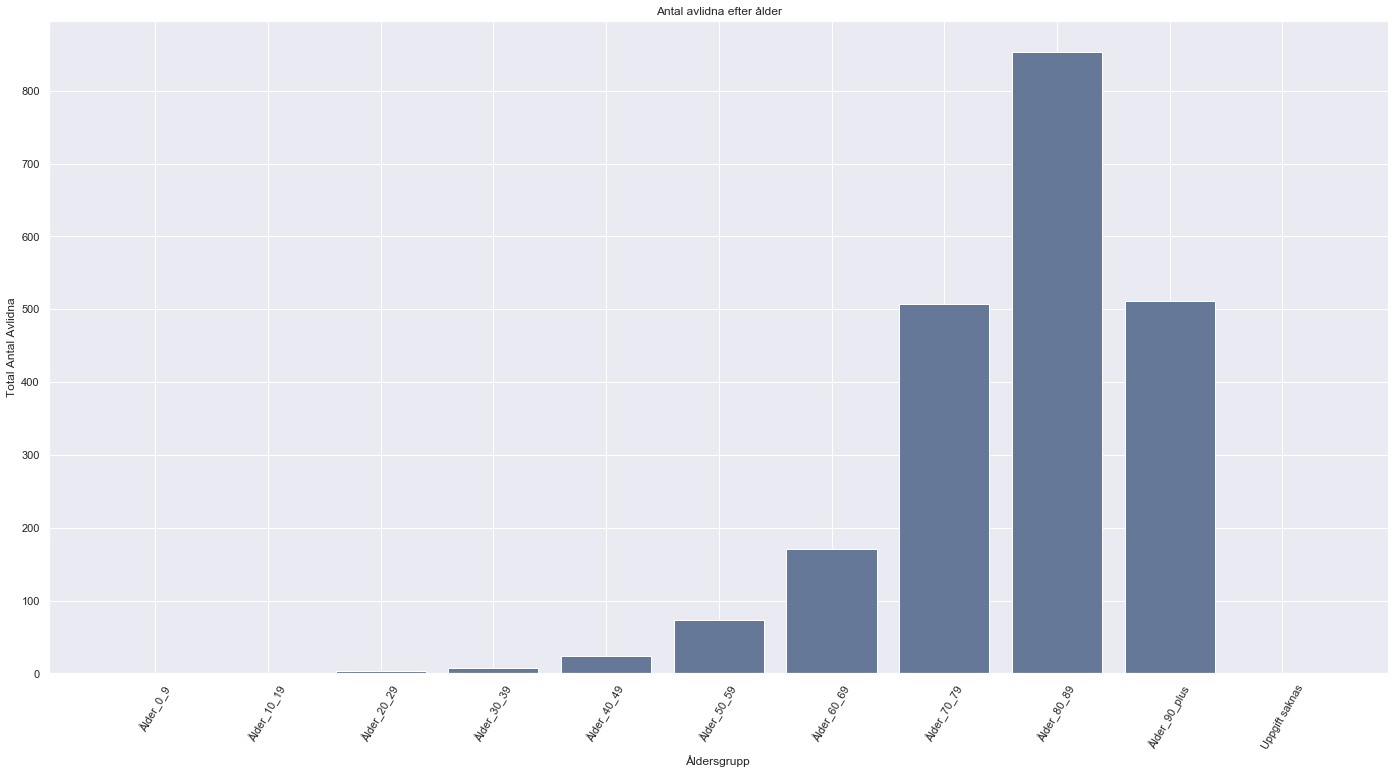

In [32]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data3['Åldersgrupp'].values,
       data3['Totalt_antal_avlidna'])

# Set title and labels for axes
ax.set(xlabel="Åldersgrupp",
       ylabel="Total Antal Avlidna",
       title="Antal avlidna efter ålder")
plt.xticks(rotation=60);
plt.show()

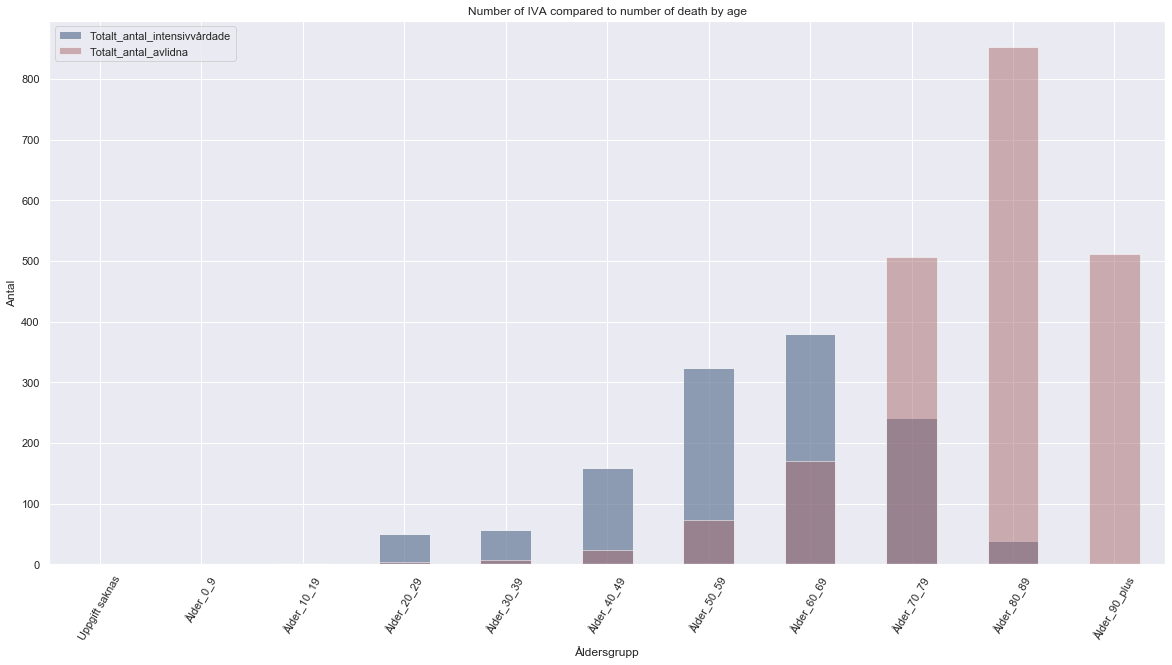

In [33]:

ax = plt.gca()
data3.sort_values(by=['Åldersgrupp']).plot(kind='bar', x='Åldersgrupp', y='Totalt_antal_intensivvårdade',
                                           figsize=(20,10), color='C0', alpha=0.7, ax=ax)
data3.sort_values(by=['Åldersgrupp']).plot(kind='bar', x='Åldersgrupp', y='Totalt_antal_avlidna',
                                           figsize=(20,10), color='C3', alpha=0.5, ax=ax)
plt.xlabel("Åldersgrupp")
plt.ylabel("Antal")
plt.title("Number of IVA compared to number of death by age")
plt.xticks(rotation=60);
plt.show()

In [34]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
Åldersgrupp                     11 non-null object
Totalt_antal_fall               11 non-null int64
Totalt_antal_intensivvårdade    11 non-null int64
Totalt_antal_avlidna            11 non-null int64
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes


In [35]:
data3.sum()

Åldersgrupp                     Ålder_0_9Ålder_10_19Ålder_20_29Ålder_30_39Ålde...
Totalt_antal_fall                                                           17567
Totalt_antal_intensivvårdade                                                 1256
Totalt_antal_avlidna                                                         2152
dtype: object